In [ ]:
import pandas as pd

df = pd.read_csv('./data/sp500.csv')

df = df.drop(columns = ['Vol.'])
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Date'] = df['Date'].dt.strftime('%m-%y')

for col in ['Price', 'Open', 'High', 'Low']:
    df[col] = df[col].str.replace(',', '').astype(float)

df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

df = df.dropna()

df


,Date,Price,Open,High,Low,Change %
251,07-24,5631.22,5638.16,5666.94,5614.75,0.28
250,07-24,5667.20,5644.09,5669.67,5639.02,0.64
249,07-24,5588.27,5610.07,5622.49,5584.81,-1.39
248,07-24,5544.59,5608.56,5614.05,5522.81,-0.78
247,07-24,5505.00,5543.37,5557.50,5497.04,-0.71
...,...,...,...,...,...,...
4,07-25,6280.46,6266.80,6290.22,6251.44,0.27
3,07-25,6259.75,6255.68,6269.44,6237.60,-0.33
2,07-25,6268.56,6255.15,6273.31,6239.22,0.14
1,07-25,6243.76,6295.29,6302.04,6241.68,-0.40


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

/var/folders/qd/xclxh05s0x9509nblm6z434w0000gp/T/ipykernel_12284/85786347.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


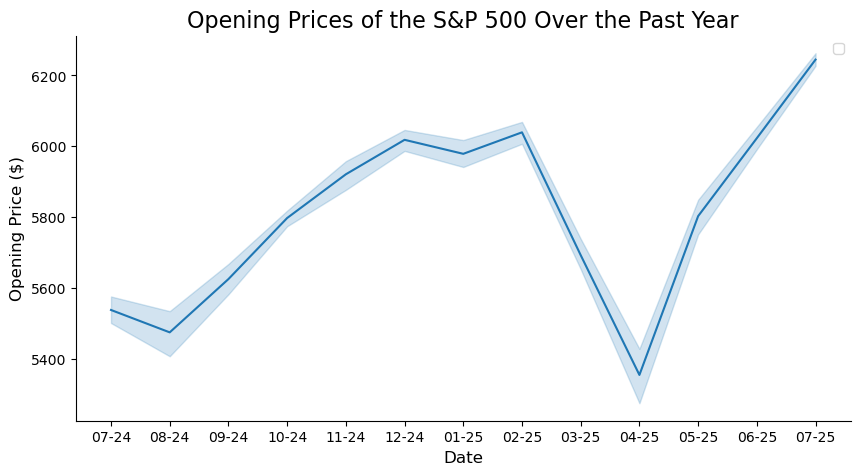

In [ ]:
# lineplot of daily opening prices

fig1, ax1 = plt.subplots(figsize = (10, 5))

opening_price = sns.lineplot(data = df, x = 'Date', y = 'Open', ax = ax1)

opening_price.set_title('Opening Prices of the S&P 500 Over the Past Year', fontsize = 16)
opening_price.set_xlabel('Date', fontsize = 12)
opening_price.set_ylabel('Opening Price ($)', fontsize = 12)

plt.show()

/var/folders/qd/xclxh05s0x9509nblm6z434w0000gp/T/ipykernel_12284/2946506713.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


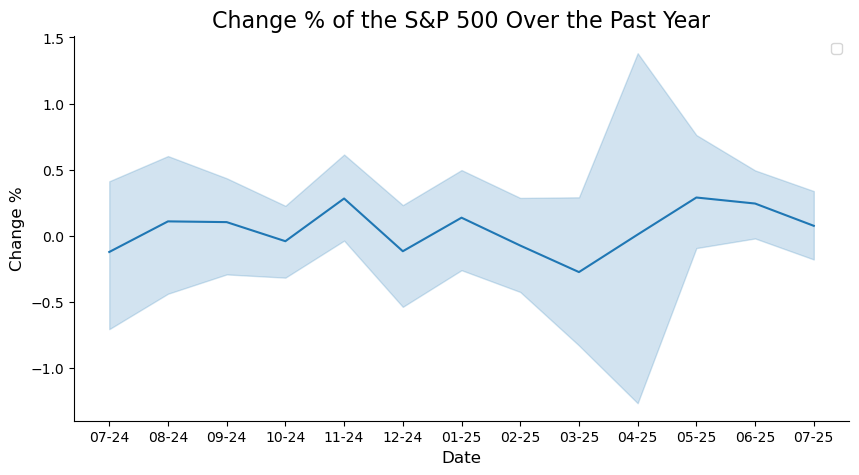

In [ ]:
# lineplot of daily change %

fig2, ax2 = plt.subplots(figsize = (10, 5))

change_percentage = sns.lineplot(data = df, x = 'Date', y = 'Change %', ax = ax2)

change_percentage.set_title('Change % of the S&P 500 Over the Past Year', fontsize = 16)
change_percentage.set_xlabel('Date', fontsize = 12)
change_percentage.set_ylabel('Change %', fontsize = 12)

plt.show()

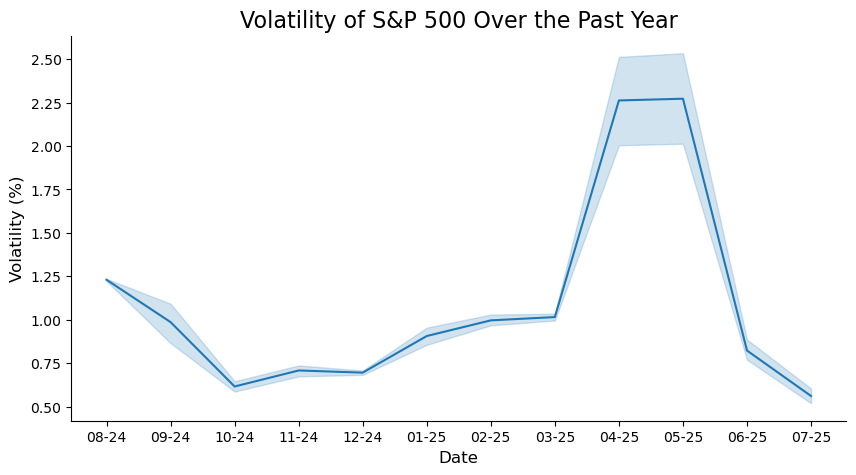

In [ ]:
# lineplot of volatility

df['Volatility'] = df['Open'].pct_change().rolling(window = 30).std() * 100

fig3, ax3 = plt.subplots(figsize = (10, 5))

volatility = sns.lineplot(data = df, x = 'Date', y = 'Volatility', ax = ax3)

volatility.set_title("Volatility of S&P 500 Over the Past Year", fontsize = 16)
volatility.set_xlabel("Date", fontsize = 12)
volatility.set_ylabel("Volatility (%)", fontsize = 12)

plt.show()


***Observations:***

The S&P 500 experienced relatively consistent growth over the past calendar year except for a steep decrease in price beginning in February of 2025 that reached the lowest point in April of 2025. During this low point, change percentage was at its highest, ranging from roughly 1.5% both upwards and downwards on individual days during April. Additionally, volatility was also at its highest during this time, hitting roughly 2.25% and increasing to 2.50% on specific days. However, in time, the S&P 500 recovered and is now steadily increasing again.